In [33]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('Housing.csv')

In [34]:
# Convert binary fields to numeric boolean fields
lb = preprocessing.LabelBinarizer()

df.driveway = lb.fit_transform(df.driveway)
df.recroom = lb.fit_transform(df.recroom)
df.fullbase = lb.fit_transform(df.fullbase)
df.gashw = lb.fit_transform(df.gashw)
df.airco = lb.fit_transform(df.airco)
df.prefarea = lb.fit_transform(df.prefarea)

In [35]:
# Create dummy variables for stories
df_stories = pd.get_dummies(df['stories'], prefix='stories', drop_first=True)

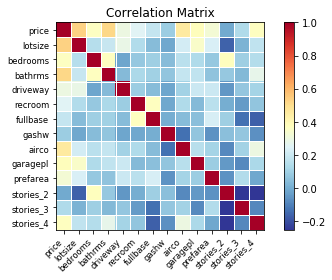

In [36]:
# Join the dummy variables to the main dataframe
df = pd.concat([df, df_stories], axis=1)
del df['stories']

# lets plot correlation matrix using statmodels graphics packages's plot_corr
# create correlation matrix
corr = df.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

In [37]:
'''Remove multicolinearity'''
# create a Python list of feature names
independent_variables = ['lotsize', 'bedrooms', 'bathrms','driveway','recroom', 'fullbase','gashw','airco','garagepl', 'prefarea', 'stories_one','stories_two','stories_three']
# use the list to select a subset from original DataFrame
X = df[independent_variables]
y = df['price']
thresh = 10

for i in np.arange(0,len(independent_variables)):
    vif = [variance_inflation_factor(X[independent_variables].values, ix) for ix in range(X[independent_variables].shape[1])]
    maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print("vif :", vif)
        print('dropping \'' + X[independent_variables].columns[maxloc] + '\'at index: ' + str(maxloc))
        del independent_variables[maxloc]
    else:
        break
print('Final variables:', independent_variables)

KeyError: "['stories_one', 'stories_three', 'stories_two'] not in index"